In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 

## Loading the dataset

In [2]:
df=pd.read_csv('global air pollution dataset.csv')

In [3]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


## Data cleaning

### columns the dataset contains 

In [4]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

### shape of the dataset 

rows = 23463 

columns = 12 

In [5]:
df.shape

(23463, 12)

### Description about the dataset 

In [6]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


### information on the dataset 

the dtype the columns contains

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [8]:
df.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

## EDA {exploratory data analysis}

### Scatter plot 

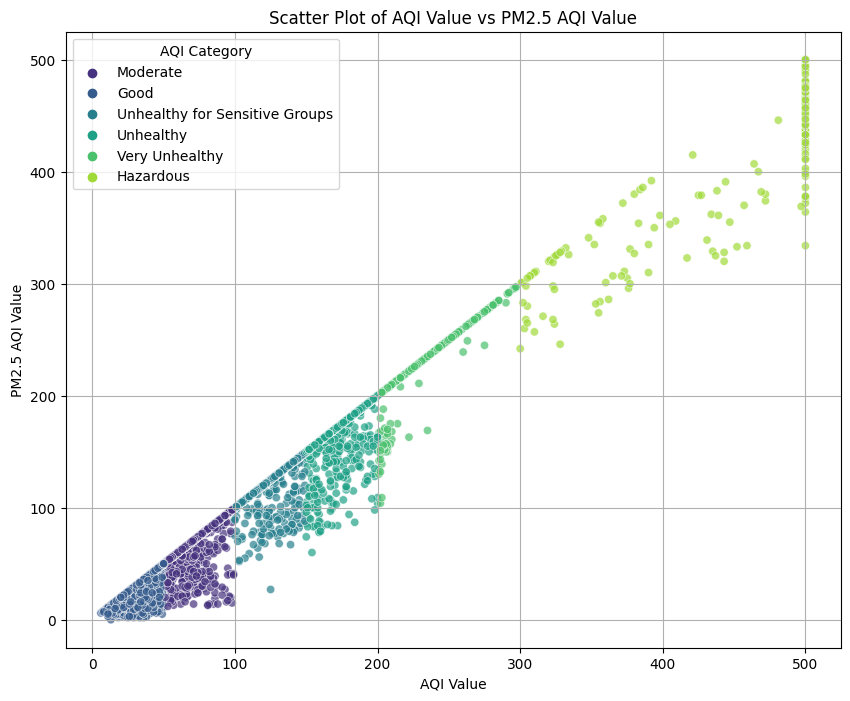

In [9]:
def plot_air_pollution_scatter(data, x_column, y_column):
    """
    Plot a scatter plot for air pollution data.

    Parameters:
        data (DataFrame): The dataset containing air pollution data.
        x_column (str): The name of the column to be used for the x-axis.
        y_column (str): The name of the column to be used for the y-axis.

    Returns:
        None
    """
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=data, x=x_column, y=y_column, hue='AQI Category', palette='viridis', alpha=0.7)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Scatter Plot of {x_column} vs {y_column}')
    plt.grid(True)
    plt.legend(title='AQI Category')
    plt.show()


# Choose columns for scatter plot
x_column = 'AQI Value'
y_column = 'PM2.5 AQI Value'

# Plot scatter plot with seaborn
plot_air_pollution_scatter(df, x_column, y_column)



This code generates a scatter plot to visualize air pollution data. The function plot_air_pollution_scatter takes three parameters: the dataset (data), the column name for the x-axis (x_column), and the column name for the y-axis (y_column).

Inside the function, it creates a scatter plot using Seaborn (sns.scatterplot) with the specified x and y columns from the dataset. Additionally, it colors the data points based on the air quality index (AQI) category using the 'viridis' color palette.

The plot is displayed with labels for the x and y axes, a title, and a legend indicating the AQI category. The legend helps identify which color corresponds to each AQI category. Finally, the function shows the plot to the user.

### Bar chart

C:\Users\SBMCODED\AppData\Local\Temp\ipykernel_3036\2546633603.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=x_column, y=y_column, ci=None)  # Setting ci=None to remove FutureWarning


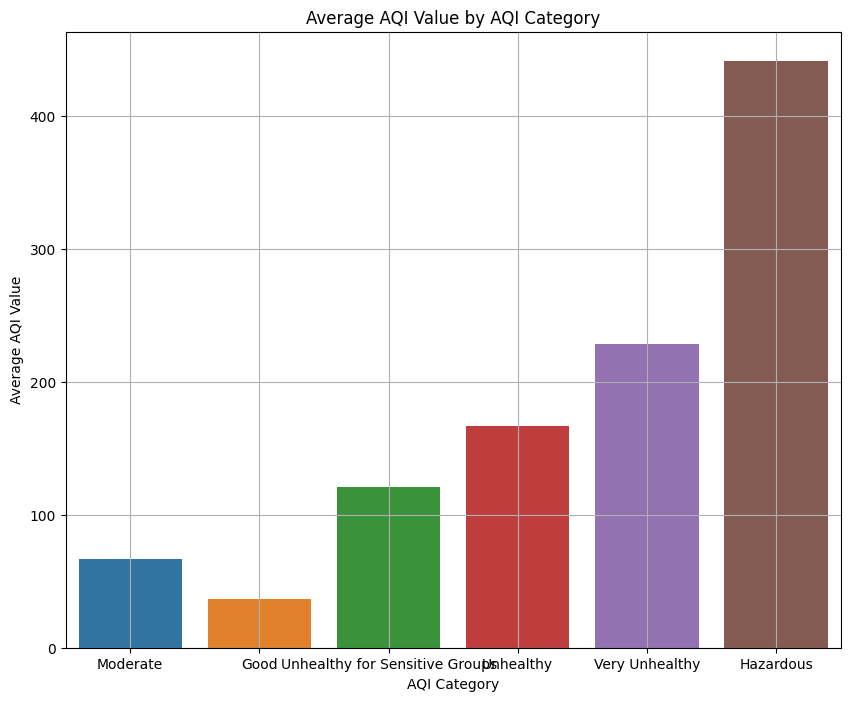

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_air_pollution_bar(data, x_column, y_column):
    """
    Plot a bar chart for air pollution data.

    Parameters:
        data (DataFrame): The dataset containing air pollution data.
        x_column (str): The name of the column to be used for the x-axis (categorical).
        y_column (str): The name of the column to be used for the y-axis (numerical).

    Returns:
        None
    """
    plt.figure(figsize=(10, 8))
    sns.barplot(data=data, x=x_column, y=y_column, ci=None)  # Setting ci=None to remove FutureWarning
    plt.xlabel(x_column)
    plt.ylabel('Average ' + y_column)
    plt.title(f'Average {y_column} by {x_column}')
    plt.grid(True)
    plt.show()

# Choose columns for bar chart
x_column = 'AQI Category'
y_column = 'AQI Value'

# Plot bar chart with seaborn
plot_air_pollution_bar(df, x_column, y_column)



This code generates a bar chart to visualize air pollution data. The function plot_air_pollution_bar takes three parameters: the dataset (data), the column name for the x-axis (x_column), and the column name for the y-axis (y_column).

Inside the function, it creates a bar chart using Seaborn (sns.barplot) with the specified x and y columns from the dataset. The bars represent the average value of the y column for each category in the x column.

The plot is displayed with labels for the x and y axes, where the y-axis label indicates it represents the average value of the y column. Additionally, it includes a title indicating the relationship between the average y column values and the categories in the x column.

### Pie chart 

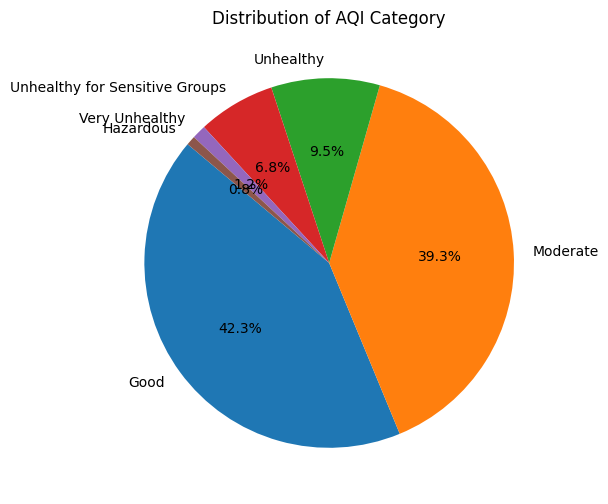

In [11]:
def plot_air_pollution_pie(data, column):
    """
    Plot a pie chart for air pollution data.

    Parameters:
        data (DataFrame): The dataset containing air pollution data.
        column (str): The name of the column to be used for the pie chart.

    Returns:
        None
    """
    plt.figure(figsize=(8, 6))
    data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()


# Choose column for pie chart
column = 'AQI Category'

# Plot pie chart
plot_air_pollution_pie(df, column)


This code generates a pie chart to visualize the distribution of air pollution data across different categories. The function plot_air_pollution_pie takes two parameters: the dataset (data) and the name of the column to be used for the pie chart (column).

Inside the function, it first calculates the count of each category in the specified column using value_counts(). Then, it plots a pie chart (kind='pie') with the percentages (autopct='%1.1f%%') and starts the angle of the first slice at 140 degrees (startangle=140).

The plot is displayed with a title indicating the distribution of the specified column and with the y-axis label removed for cleaner visualization.

### Histogram 

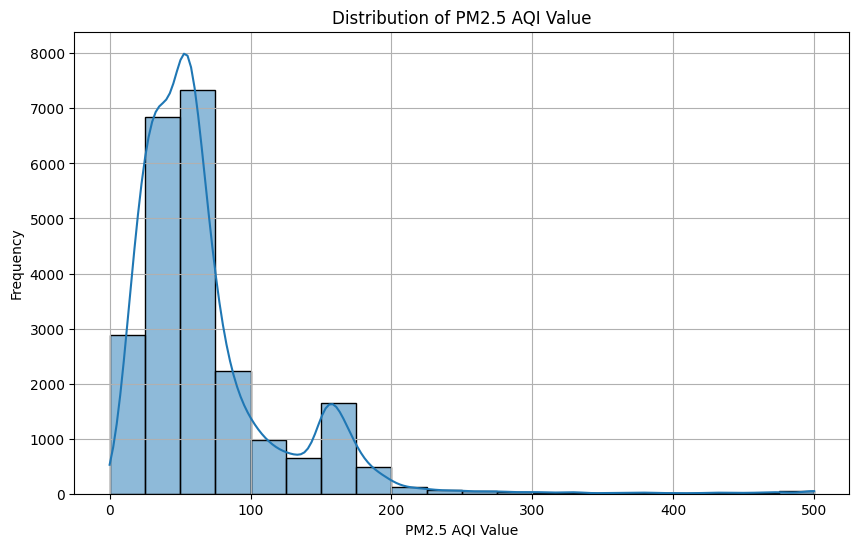

In [12]:
def plot_air_pollution_histogram(data, column):
    """
    Plot a histogram for air pollution data.

    Parameters:
        data (DataFrame): The dataset containing air pollution data.
        column (str): The name of the column to be used for the histogram.

    Returns:
        None
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=20, kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.grid(True)
    plt.show()


# Choose column for histogram
column = 'PM2.5 AQI Value'

# Plot histogram
plot_air_pollution_histogram(df, column)



This code generates a histogram to visualize the distribution of air pollution data for a specific column. The function plot_air_pollution_histogram takes two parameters: the dataset (data) and the name of the column to be used for the histogram (column).

Inside the function, it utilizes Seaborn's histplot function to create the histogram. It specifies the number of bins (bins=20) and includes a kernel density estimate (kde=True) to represent the distribution.

The plot is displayed with labeled x and y axes, a title indicating the distribution of the specified column, and grid lines for better readability.

### Heatmap 

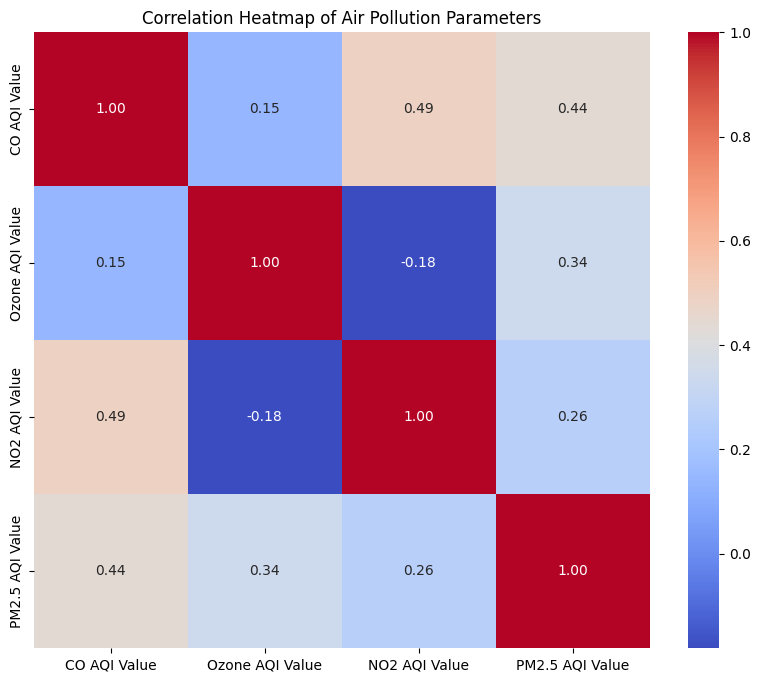

In [13]:
def plot_air_pollution_heatmap(data):
    """
    Plot a heatmap to visualize the correlation between air pollution parameters.

    Parameters:
        data (DataFrame): The dataset containing air pollution data.

    Returns:
        None
    """
    # Selecting columns for the heatmap
    columns = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

    # Calculating the correlation matrix
    corr = data[columns].corr()

    # Creating the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title('Correlation Heatmap of Air Pollution Parameters')
    plt.show()

# Plot the heatmap
plot_air_pollution_heatmap(df)


This code generates a heatmap to visualize the correlation between air pollution parameters. The function plot_air_pollution_heatmap takes one parameter: the dataset (data).

Inside the function:

It selects specific columns relevant to air pollution parameters (CO AQI Value, Ozone AQI Value, NO2 AQI Value, PM2.5 AQI Value).
Calculates the correlation matrix using these selected columns.
Creates the heatmap using Seaborn's heatmap function, with annotations (annot=True) to display correlation values, a color map (cmap='coolwarm') for better visualization, and a format (fmt=".2f") to display correlation values with two decimal places.
The plot is displayed with a title indicating it's a correlation heatmap of air pollution parameters.

## STATISTICAL SUMMARY 

In [14]:

# Calculate summary statistics
summary_stats = df.describe(include='all')

# Format the table
summary_stats_formatted = summary_stats.applymap(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else x)

# Display the summary statistics
print("Summary Statistics:")
print(summary_stats_formatted)


Summary Statistics:
                         Country        City AQI Value AQI Category  \
count                      23036       23462  23463.00        23463   
unique                    175.00    23462.00       nan         6.00   
top     United States of America  Praskoveya       nan         Good   
freq                        2872           1       nan         9936   
mean                         nan         nan     72.01          nan   
std                          nan         nan     56.06          nan   
min                          nan         nan      6.00          nan   
25%                          nan         nan     39.00          nan   
50%                          nan         nan     55.00          nan   
75%                          nan         nan     79.00          nan   
max                          nan         nan    500.00          nan   

       CO AQI Value CO AQI Category Ozone AQI Value Ozone AQI Category  \
count      23463.00           23463        23463.00  


This code calculates summary statistics for the DataFrame df using the describe method. It includes statistics for numeric and categorical columns.

Then, it formats the table to ensure numeric values are displayed with two decimal places using a lambda function applied with applymap.

Finally, it prints the formatted summary statistics table to the console, providing insights into the distribution and characteristics of the dataset.

In [15]:
# Calculate mean
mean_value = df['PM2.5 AQI Value'].mean()

# Calculate median
median_value = df['PM2.5 AQI Value'].median()

# Calculate standard deviation
std_deviation = df['PM2.5 AQI Value'].std()

# Calculate quartiles
quartiles = df['PM2.5 AQI Value'].quantile([0.25, 0.5, 0.75])

# Print the results
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_deviation)
print("Quartiles:")
print(quartiles)


Mean: 68.51975450709628
Median: 54.0
Standard Deviation: 54.796443160210934
Quartiles:
0.25    35.0
0.50    54.0
0.75    79.0
Name: PM2.5 AQI Value, dtype: float64
